In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Reload data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=columns)
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Feature selection (or use full features if desired)
X = df.drop("target", axis=1)
y = df["target"]
X_scaled = StandardScaler().fit_transform(X)


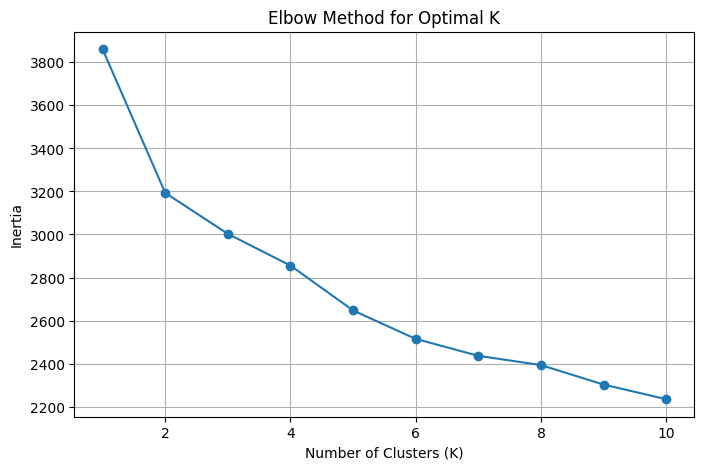

In [3]:
# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


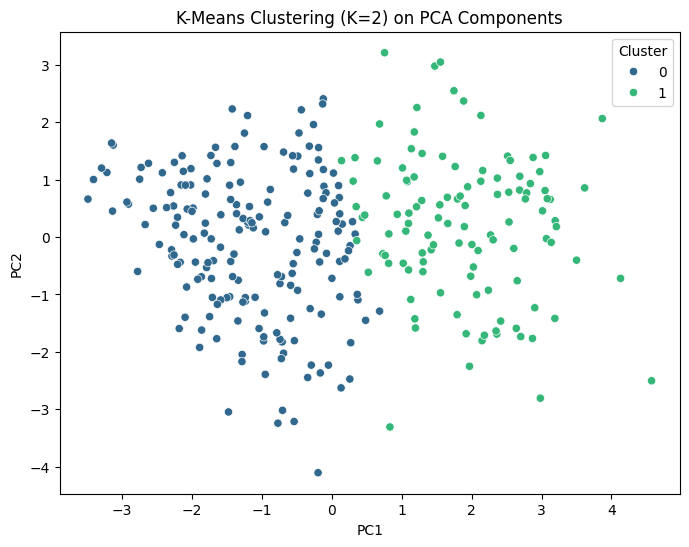

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add clustering results to the dataframe
df['cluster_kmeans'] = clusters_kmeans

# Visualize with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_kmeans'], palette='viridis')
plt.title("K-Means Clustering (K=2) on PCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


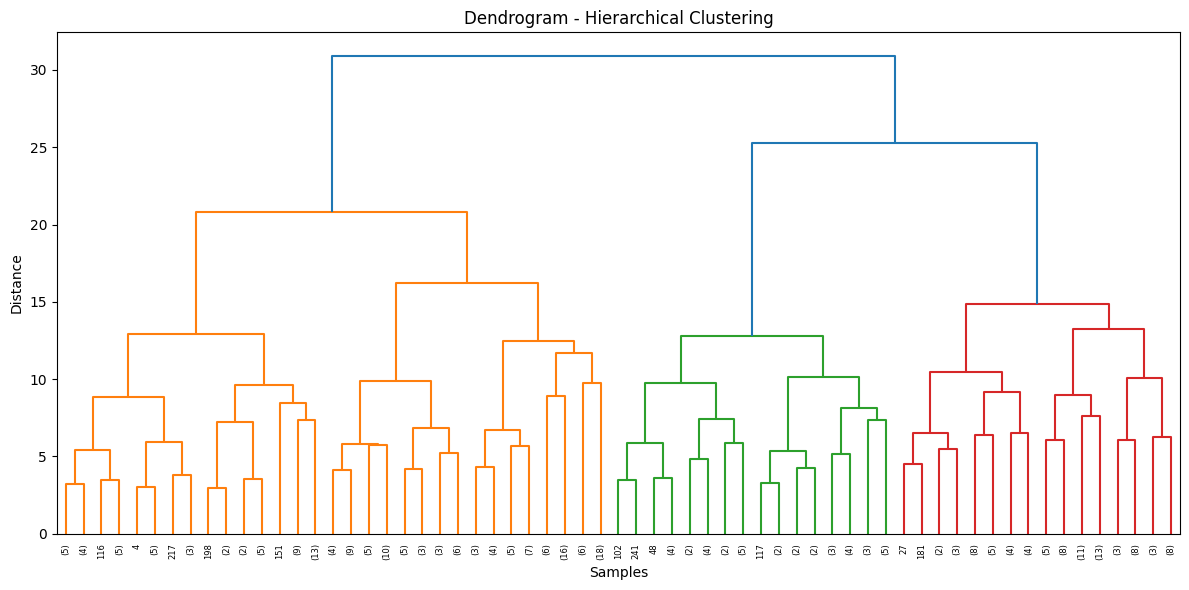

In [5]:
# Hierarchical linkage and dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [6]:
# Cut the dendrogram into 2 clusters
clusters_hier = fcluster(linked, t=2, criterion='maxclust')
df['cluster_hierarchical'] = clusters_hier

# Compare to actual labels
ct_kmeans = pd.crosstab(df['cluster_kmeans'], df['target'], rownames=['KMeans Cluster'], colnames=['Actual Target'])
ct_hier = pd.crosstab(df['cluster_hierarchical'], df['target'], rownames=['Hierarchical Cluster'], colnames=['Actual Target'])

print("KMeans Clustering vs Target:\n", ct_kmeans)
print("\nHierarchical Clustering vs Target:\n", ct_hier)


KMeans Clustering vs Target:
 Actual Target     0    1
KMeans Cluster          
0               147   37
1                13  100

Hierarchical Clustering vs Target:
 Actual Target           0   1
Hierarchical Cluster         
1                     117  51
2                      43  86
